# Modeling and Evaluation

In [52]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [74]:
os.chdir("C:\\Users\\kumarvch\\OneDrive - HP Inc\\census_income_casestudy")

In [77]:
Train = pd.read_csv("data_std_scale.csv")
test = pd.read_csv("data_std_scale_test.csv")

In [80]:
Train.shape , test.shape

((32561, 44), (16281, 44))

In [81]:
Train_X = Train.drop(['Income'] , axis=1)
Train_Y = Train['Income']

In [82]:
test_x = test.drop(['Income'], axis=1)
test_y = test['Income']

In [83]:
Train_X.shape , Train_Y.shape , test_x.shape , test_y.shape

((32561, 43), (32561,), (16281, 43), (16281,))

0    0.75919
1    0.24081
Name: Income, dtype: float64

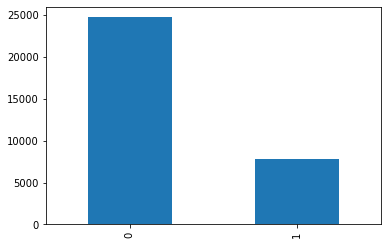

In [84]:
Train.Income.value_counts().plot(kind = 'bar')
Train.Income.value_counts(normalize=True)

## Target class Imbalance

A) SMOTE Technique

In [85]:
counter = Counter(Train_Y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(Train_X, Train_Y)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 24720, 1: 7841})
After Counter({0: 24720, 1: 24720})


B) SMOTE + Tomek Links

In [57]:
from imblearn.combine import SMOTETomek

counter = Counter(Train_Y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(Train_X, Train_Y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 24720, 1: 7841})
After Counter({0: 24134, 1: 24134})


# Model Building

In [86]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [87]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Model_1: Logistic Regression
    
#### unsampled Data

In [66]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model,params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(Train_X, Train_Y)
clf_LR.best_estimator_

C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7977675         nan 0.79779907        nan 0.79783036
        nan 0.79781411        nan 0.7978827         nan 0.7978997
        nan 0.79783255        nan 0.79782345        nan 0.79793966
        nan 0.79797577        nan 0.79862557        nan 0.79889428
        nan 0.80248058        nan 0.80394196        nan 0.81735926
        nan 0.82238147        nan 0.85519694        nan 0.86427556
        nan 0.88726164        nan 0.88904993        nan 0.89739929
        nan 0.8975947         nan 0.90017448        nan 0.90012769
        nan 0.9004523         nan 0.90040426        nan 0.90044054
        nan 0.90041889        nan 0.900383          nan 0.90041892]
  warnings.warn(
C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

LogisticRegression(C=0.26826957952797276)

In [88]:
test_eval(clf_LR, test_x, test_y, 'Logistic Regression', 'actual')

Confusion Matrix
[[11534   901]
 [ 1601  2245]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.77     16281
weighted avg       0.84      0.85      0.84     16281
 

AUC-ROC
0.8992446629911839


####  SMOTE Data

In [89]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79480057        nan 0.79480057        nan 0.79482409
        nan 0.79482409        nan 0.79496545        nan 0.79496545
        nan 0.7948441         nan 0.7948441         nan 0.79508853
        nan 0.79508853        nan 0.7965622         nan 0.7965622
        nan 0.80398513        nan 0.80398513        nan 0.82856607
        nan 0.82856607        nan 0.87361757        nan 0.87361757
        nan 0.89342694        nan 0.89342694        nan 0.90411341
        nan 0.90411341        nan 0.91116184        nan 0.91116184
        nan 0.91364494        nan 0.91364494        nan 0.91417455
        nan 0.91417455        nan 0.91402031        nan 0.91402031]
  warnings.warn(
C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

LogisticRegression(C=1.6378937069540613)

In [90]:
test_eval(clf_LR, test_x, test_y, 'Logistic Regression', 'smote')

Confusion Matrix
[[10046  2389]
 [  723  3123]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     12435
           1       0.57      0.81      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.81      0.77     16281
weighted avg       0.85      0.81      0.82     16281
 

AUC-ROC
0.8925145441684174


#### SMOTE + Tomek Links data

In [91]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80178633        nan 0.80178684        nan 0.80180868
        nan 0.80180879        nan 0.80194676        nan 0.80194679
        nan 0.80182818        nan 0.80182815        nan 0.80206527
        nan 0.80206529        nan 0.80351403        nan 0.80351411
        nan 0.8107606         nan 0.81076051        nan 0.83483523
        nan 0.83483523        nan 0.87986477        nan 0.87986475
        nan 0.90019264        nan 0.90019252        nan 0.91083994
        nan 0.9108403         nan 0.91786886        nan 0.91783377
        nan 0.92038868        nan 0.92030539        nan 0.92062832
        nan 0.92068532        nan 0.9207094         nan 0.92079426]
  warnings.warn(
C:\Users\kumarvch\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERA

LogisticRegression(C=10.0, class_weight='balanced')

In [92]:
test_eval(clf_LR, test_x, test_y, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[10074  2361]
 [  728  3118]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     12435
           1       0.57      0.81      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.81      0.77     16281
weighted avg       0.85      0.81      0.82     16281
 

AUC-ROC
0.8927556523250073


# Model 2 : Decision Tree

In [93]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

#### Unsampled Data

In [94]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(Train_X, Train_Y)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=50)

In [95]:
test_eval(clf_DT, test_x, test_y, 'Decision Tree', 'actual')

Confusion Matrix
[[11853   582]
 [ 1840  2006]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.78      0.52      0.62      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281
 

AUC-ROC
0.9001613277237162


#### SMOTE Data

In [97]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=20)

In [98]:
test_eval(clf_DT, test_x, test_y, 'Decision Tree', 'smote')

Confusion Matrix
[[6494 5941]
 [ 442 3404]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.52      0.67     12435
           1       0.36      0.89      0.52      3846

    accuracy                           0.61     16281
   macro avg       0.65      0.70      0.59     16281
weighted avg       0.80      0.61      0.63     16281
 

AUC-ROC
0.6882818529468159


In [99]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=100)

In [100]:
test_eval(clf_DT,test_x, test_y, 'Decision Tree', 'smote+tomek')

Confusion Matrix
[[7486 4949]
 [ 418 3428]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.60      0.74     12435
           1       0.41      0.89      0.56      3846

    accuracy                           0.67     16281
   macro avg       0.68      0.75      0.65     16281
weighted avg       0.82      0.67      0.69     16281
 

AUC-ROC
0.8110748643858099


In [101]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [102]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.713605,0.583723,0.642162,0.899245
1,Logistic Regression,smote,0.566582,0.812012,0.667450,0.892515
2,Logistic Regression,smote+tomek,0.569082,0.810712,0.668740,0.892756
3,Decision Tree,actual,0.775116,0.521581,0.623562,0.900161
4,Decision Tree,smote,0.364259,0.885075,0.516109,0.688282
5,Decision Tree,smote+tomek,0.409216,0.891316,0.560910,0.811075


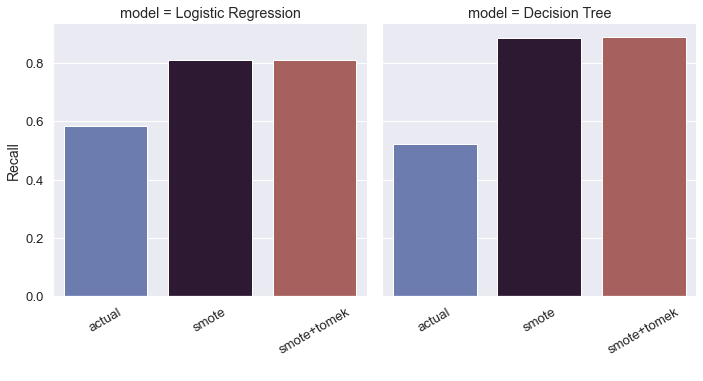

In [104]:
sb.set(font_scale=1.2)
g = sb.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sb.barplot, "resample", "recall", palette='twilight', order=["actual", "smote","smote+tomek"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)